# Simulation of Time Depentent Schrodinger Equation

- The Schrodinger equation is a linear partial differential equation that governs the wave function of a quantum mechanical system.
- Conceptually it is the quantum counterpart of Newton's second law in classicial mechanics.
- The quantity that characterize De-Broglie web equation is called wave function. It is denoted by Psi.


1. Import all the necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numba
from numba import jit

2. Define all the necessary parameters

In [3]:
Num_x = 301
Num_t = 100000
dx = 1/(Num_x - 1)
dt = 1e-7
hcot = 1
m = 1
x = np.linspace(0, 1, Num_x)
# x

In [4]:
psi_0 = np.sqrt(2)*np.sin(np.pi*x)
normal = np.sum(np.absolute(psi_0)**2)*dx
# psi_0
# normal

In [5]:
# Potential energy
mu, sigma = 1/2, 1/20
V = -1e4 * np.exp(-(x-mu)**2/(2*sigma**2))

Text(0, 0.5, '$V(x)$')

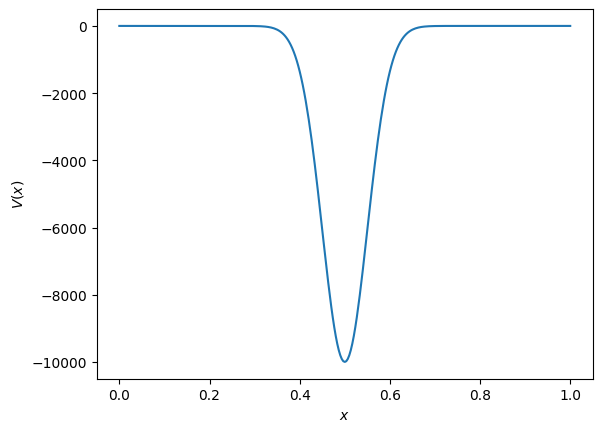

In [6]:
# Draw potential
plt.figure()
plt.plot(x, V)
plt.xlabel("$x$")
plt.ylabel("$V(x)$")

In [7]:
dt/dx**2

0.008999999999999998

3. Construct the array of psi(x, t), 
and calculate using Finite Difference Method

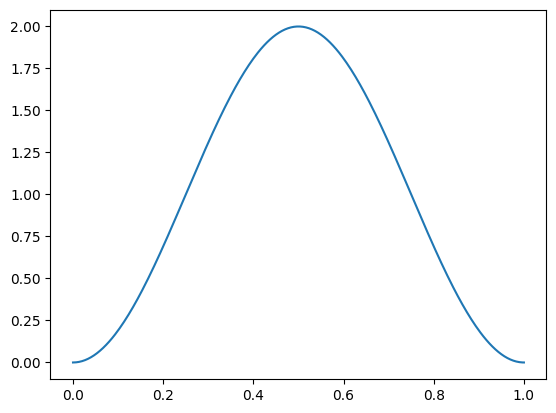

In [8]:
psi = np.zeros([Num_t, Num_x])
psi[0] = psi_0
# psi
plt.plot(x, np.absolute(psi[0])**2)

In [9]:
@numba.jit("c16[:,:](c16[:,:])", nopython=True, nogil=True)
def compute_psi(psi):
    for t in range(0, Num_t-1):
        for i in range(1, Num_x-1):
            psi[t+1][i] = psi[t][i] + 1j/2 * dt/dx**2 * (psi[t][i+1] - 2*psi[t][i] + psi[t][i-1]) - 1j*dt*V[i]*psi[t][i]
        
        normal = np.sum(np.absolute(psi[t+1])**2)*dx
        for i in range(1, Num_x-1):
            psi[t+1][i] = psi[t+1][i]/normal
        
    return psi

In [10]:
psi_calc = compute_psi(psi.astype(complex))
# psi[100]

0.9999999999992156

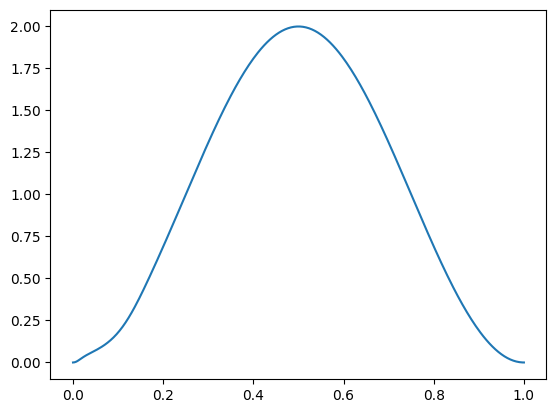

In [11]:
plt.plot(x, np.absolute(psi_calc[5000])**2)
np.sum(np.absolute(psi_calc[5000])**2)*dx

4. Animation

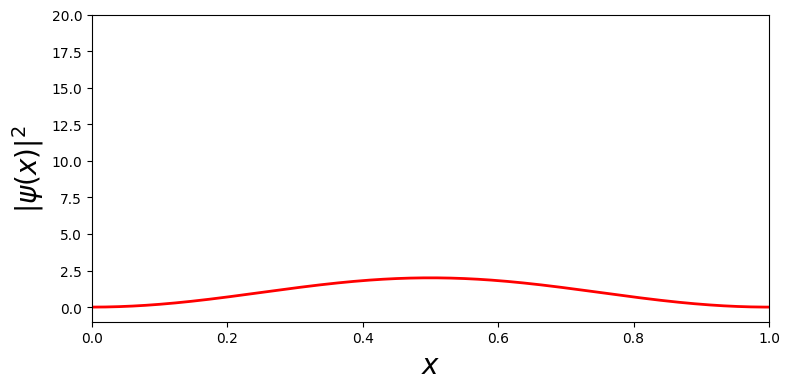

In [12]:
def animate(i):
    line.set_data(x, np.absolute(psi_calc[100*i])**2)
    
fig, ax = plt.subplots(1,1, figsize=(8,4))
line, = plt.plot([], [], 'r-', lw=2, markersize=8, label='FDM')

ax.set_ylim(-1, 20)
ax.set_xlim(0,1)
ax.set_ylabel('$|\psi(x)|^2$', fontsize=20)
ax.set_xlabel('$x$', fontsize=20)
plt.tight_layout()

ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('probdensityfun.gif',writer='pillow',fps=50,dpi=100)
# plt.show()